## DiffRate Visualization
We provide some visualization functions to visualize the effect of DiffRate like in our paper.

In [6]:
import timm
import DiffRate
import pitome
import tome
from torchvision import transforms
from torchvision.transforms.functional import InterpolationMode
from PIL import Image
ratio = 0.90

In [7]:
# We use the timm augreg models here, but you can use any supported implementation.
model_name = "deit_base_patch16_224"
tome_model = timm.create_model(model_name, pretrained=True)

# Source tracing is necessary for visualization!
tome.patch.deit(tome_model, trace_source=True, use_k=False)
tome_model.ratio=ratio
# DiffRate.patch.deit(model, trace_source=True)

using tome


In [8]:
input_size = tome_model.default_cfg["input_size"][1]

# Make sure the transform is correct for your model!
transform_list = [
    transforms.Resize(int((256 / 224) * input_size), interpolation=InterpolationMode.BICUBIC),
    transforms.CenterCrop(input_size)
]

# The visualization and model need different transforms
transform_vis  = transforms.Compose(transform_list)
transform_norm = transforms.Compose(transform_list + [
    transforms.ToTensor(),
    transforms.Normalize(tome_model.default_cfg["mean"], tome_model.default_cfg["std"]),
])

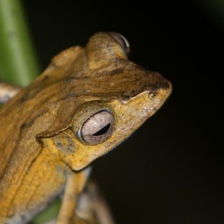

In [9]:
img = Image.open("figures/tree_frog.JPEG")
img_vis = transform_vis(img)
img_norm = transform_norm(img)

img_vis

## Visualize one image
You can play with the `r` value to get different numbers of tokens at the end of the network.

59 tokens at the end


/media/caduser/MyBook/DATA/vit_token_compress/PiToMe/ic/tome/vis.py:66: RuntimeWarning: invalid value encountered in divide
  color = (mask * img).sum(axis=(0, 1)) / mask.sum()


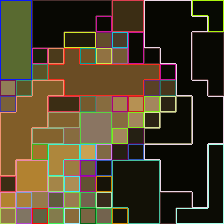

In [10]:
tome_model = tome_model.eval()

_ = tome_model(img_norm[None, ...])
source = tome_model._tome_info["source"]


print(f"{source.shape[1]} tokens at the end")
tome.make_visualization(img_vis, source, patch_size=16, class_token=True)

In [13]:
source.shape

torch.Size([1, 59, 197])

In [12]:
# We use the timm augreg models here, but you can use any supported implementation.
model_name = "deit_base_patch16_224"
pitome_model = timm.create_model(model_name, pretrained=True)

# Source tracing is necessary for visualization!
pitome.patch.deit(pitome_model, trace_source=True, use_k=False)
pitome_model.ratio=ratio
# DiffRate.patch.deit(model, trace_source=True)

using pitome


60 tokens at the end
num_group 60
vis torch.Size([1, 196])
mask torch.Size([1, 1, 14, 14])
color (3,)
mask edge (224, 224, 1)
vis torch.Size([1, 196])
mask torch.Size([1, 1, 14, 14])
color (3,)
mask edge (224, 224, 1)
vis torch.Size([1, 196])
mask torch.Size([1, 1, 14, 14])
color (3,)
mask edge (224, 224, 1)
vis torch.Size([1, 196])
mask torch.Size([1, 1, 14, 14])
color (3,)
mask edge (224, 224, 1)
vis torch.Size([1, 196])
mask torch.Size([1, 1, 14, 14])
color (3,)
mask edge (224, 224, 1)
vis torch.Size([1, 196])
mask torch.Size([1, 1, 14, 14])
color (3,)
mask edge (224, 224, 1)
vis torch.Size([1, 196])
mask torch.Size([1, 1, 14, 14])
color (3,)
mask edge (224, 224, 1)
vis torch.Size([1, 196])
mask torch.Size([1, 1, 14, 14])
color (3,)
mask edge (224, 224, 1)
vis torch.Size([1, 196])
mask torch.Size([1, 1, 14, 14])
color (3,)
mask edge (224, 224, 1)
vis torch.Size([1, 196])
mask torch.Size([1, 1, 14, 14])
color (3,)
mask edge (224, 224, 1)
vis torch.Size([1, 196])
mask torch.Size([1, 1

color (3,)
mask edge (224, 224, 1)
vis torch.Size([1, 196])
mask torch.Size([1, 1, 14, 14])
color (3,)
mask edge (224, 224, 1)
vis torch.Size([1, 196])
mask torch.Size([1, 1, 14, 14])
color (3,)
mask edge (224, 224, 1)
vis torch.Size([1, 196])
mask torch.Size([1, 1, 14, 14])
color (3,)
mask edge (224, 224, 1)
vis torch.Size([1, 196])
mask torch.Size([1, 1, 14, 14])
color (3,)
mask edge (224, 224, 1)
vis torch.Size([1, 196])
mask torch.Size([1, 1, 14, 14])
color (3,)
mask edge (224, 224, 1)
vis torch.Size([1, 196])
mask torch.Size([1, 1, 14, 14])
color (3,)
mask edge (224, 224, 1)
vis torch.Size([1, 196])
mask torch.Size([1, 1, 14, 14])
color (3,)
mask edge (224, 224, 1)
vis torch.Size([1, 196])
mask torch.Size([1, 1, 14, 14])
color (3,)
mask edge (224, 224, 1)
vis torch.Size([1, 196])
mask torch.Size([1, 1, 14, 14])
color (3,)
mask edge (224, 224, 1)
vis torch.Size([1, 196])
mask torch.Size([1, 1, 14, 14])
color (3,)
mask edge (224, 224, 1)
vis torch.Size([1, 196])
mask torch.Size([1, 

/media/caduser/MyBook/DATA/vit_token_compress/PiToMe/ic/pitome/vis.py:68: RuntimeWarning: invalid value encountered in divide
  color = (mask * img).sum(axis=(0, 1)) / mask.sum()


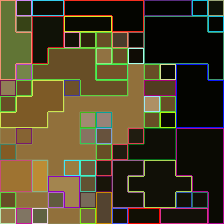

In [12]:
model = pitome_model.eval()

_ = model(img_norm[None, ...])
source = model._tome_info["source"]


print(f"{source.shape[1]} tokens at the end")
pitome.make_visualization(img_vis, source, patch_size=16, class_token=True)